# Deep Learning Project: Camera pose plot 실습 2
This is a tutorial to Plot Camera Poses Exported from Reality Capture.

## Reality Capture's Camera Frame View


# Plot Team 1

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def eul2rot(heading, pitch, roll):
    """Converts Euler angles to rotation matrix: heading, pitch, roll -> rotation about X, Y, Z
    XYZ sequence or ZYX sequence - Robot or Mobile """
    heading, pitch, roll = np.deg2rad(heading), np.deg2rad(pitch), np.deg2rad(roll)
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(heading), -np.sin(heading)],
        [0, np.sin(heading), np.cos(heading)]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rz = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])

    R = Rz@Ry@Rx
    return R


Text(0, 0.5, 'y')

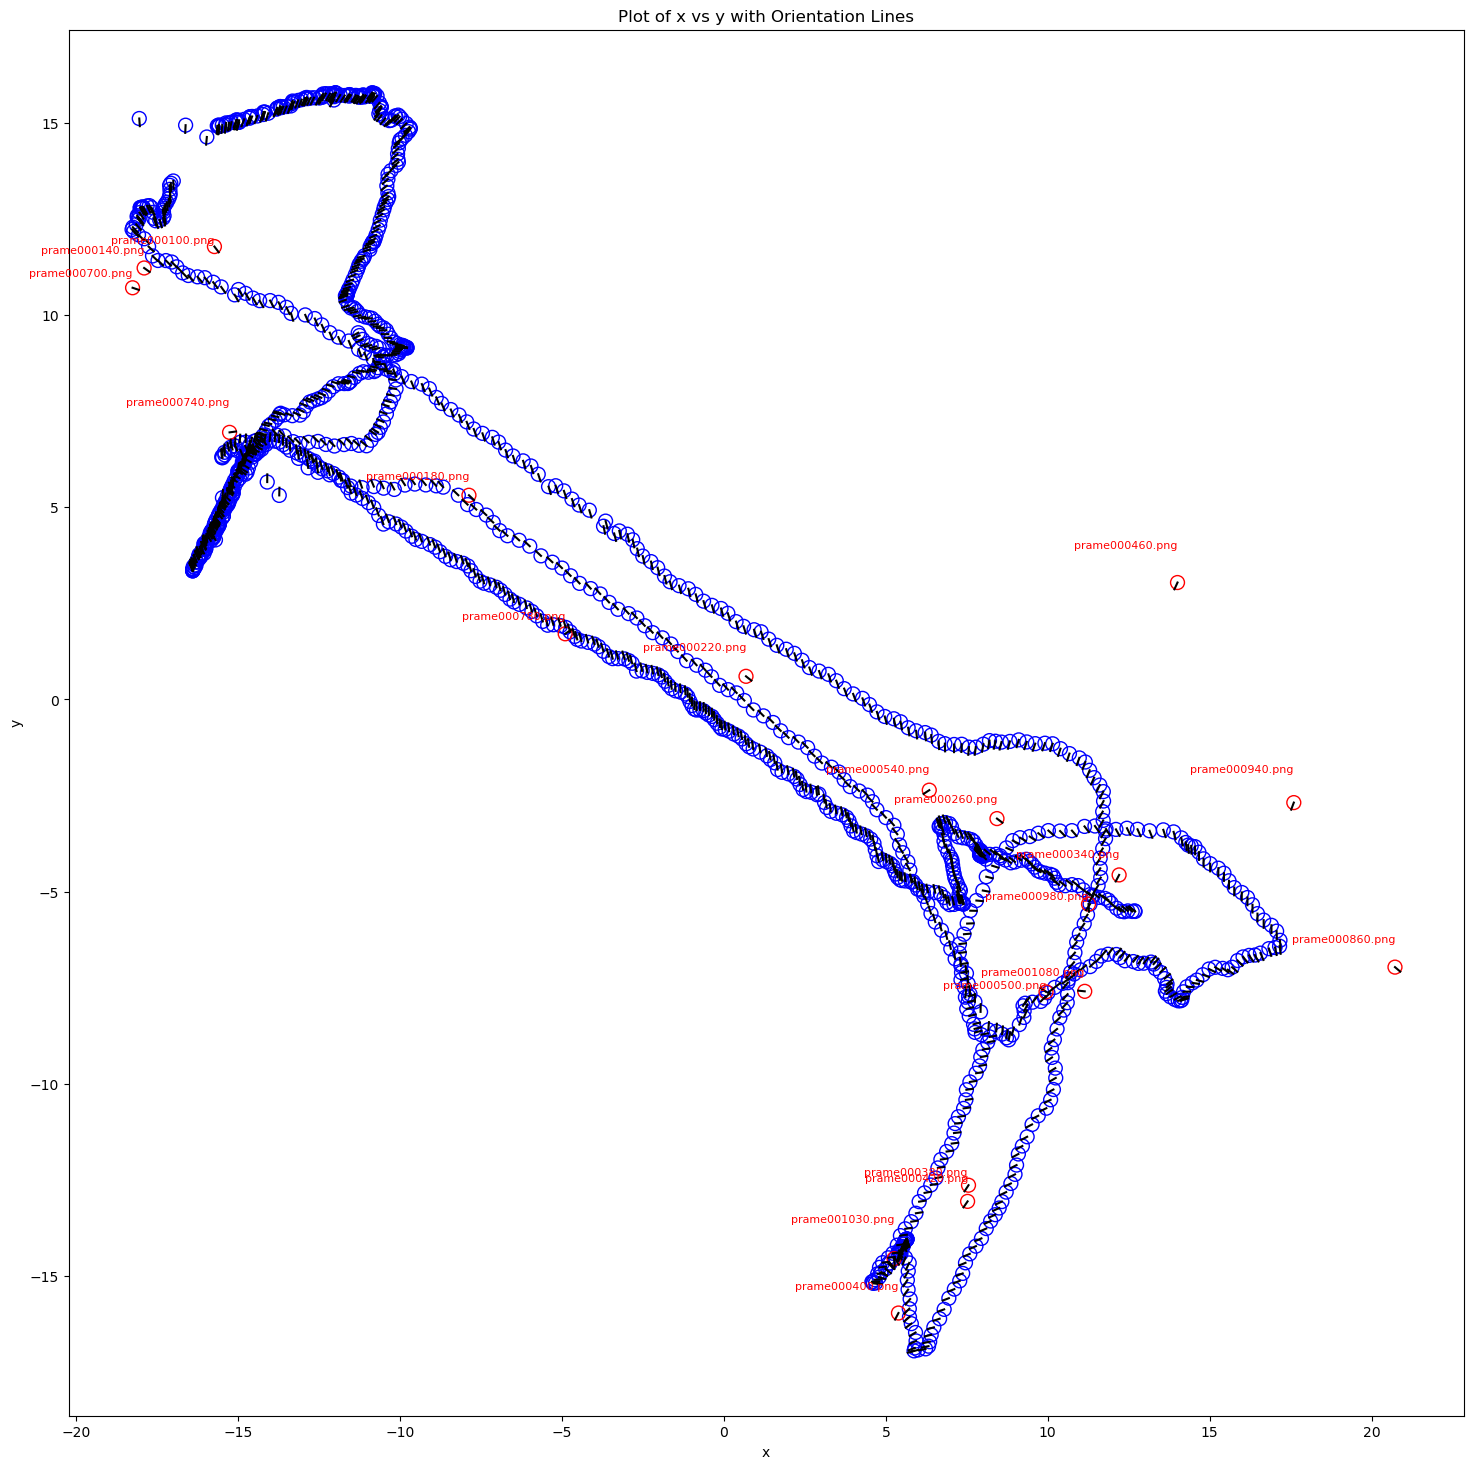

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'real_final_team1.csv'
data = pd.read_csv(file_path,  skiprows=1)

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length

# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(18, 18))

# Determine which entries start with "prame" and which with "frame"
is_prame = data['#name'].str.startswith('prame')
# Plotting x vs y with circle points for "frame" and "prame"
plt.scatter(data[~is_prame]['x'], data[~is_prame]['y'], s=100, facecolors='none', edgecolors='b', label='Frame')  # Circle points for "frame"
plt.scatter(data[is_prame]['x'], data[is_prame]['y'], s=100, facecolors='none', edgecolors='r', label='Prame')  # Circle points for "prame"

for _, row in data.iterrows():
    plt.plot([row['x'], end_x[_]], [row['y'], end_y[_]], 'k-')  # Lines for orientation

for _, row in data[is_prame].iterrows():
    plt.text(row['x'], row['y']+np.random.rand(1), row['#name'], color='r', fontsize=8, ha='right')


plt.title('Plot of x vs y with Orientation Lines')
plt.xlabel('x')
plt.ylabel('y')


# Plot Sim data

## Outlier remover

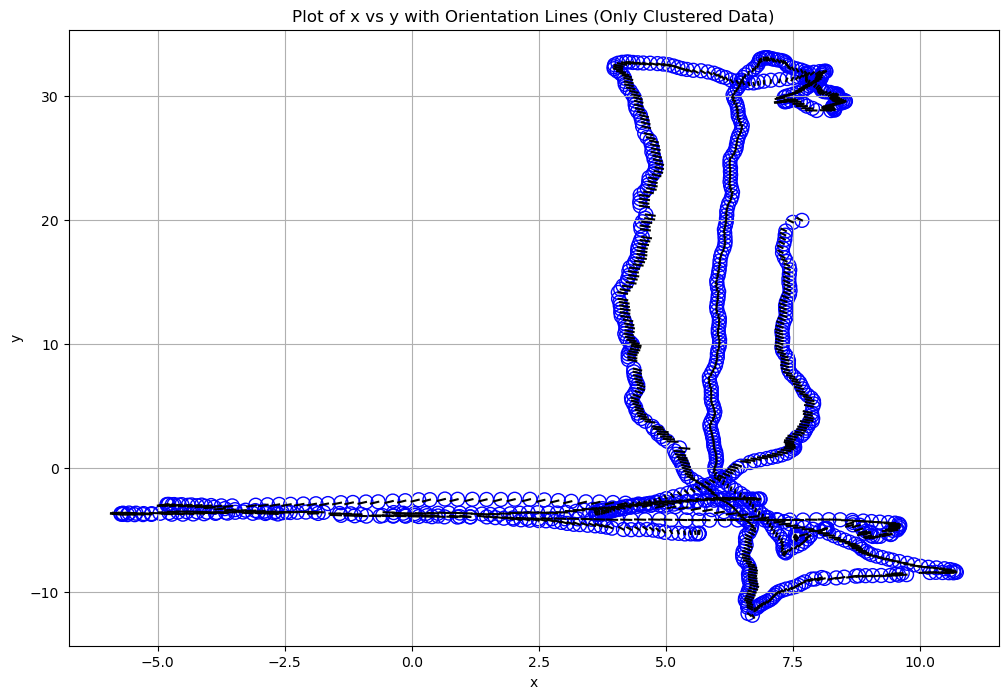

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the CSV file
file_path = 'rene4_cpu_int_ext_rpy.csv'
data = pd.read_csv(file_path)

# Assuming the file has columns named 'x', 'y', and 'heading'
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=3)  # eps and min_samples need to be adjusted based on your data
data['cluster'] = dbscan.fit_predict(data[['x', 'y']])

# Filter out noise (-1 labels are considered noise)
clustered_data = data[data['cluster'] != -1]

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(clustered_data['heading'], clustered_data['pitch'], clustered_data['roll'])
])

# Extract x and y components
end_x = clustered_data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = clustered_data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length


# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(12, 8))
plt.scatter(clustered_data['x'], clustered_data['y'], s=100, facecolors='none', edgecolors='b')  # Circle points
for _, row in clustered_data.iterrows():
    plt.plot([row['x'], end_x[_]], [row['y'], end_y[_]], 'k-')  # Lines for orientation

plt.title('Plot of x vs y with Orientation Lines (Only Clustered Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## Plot the selected poses

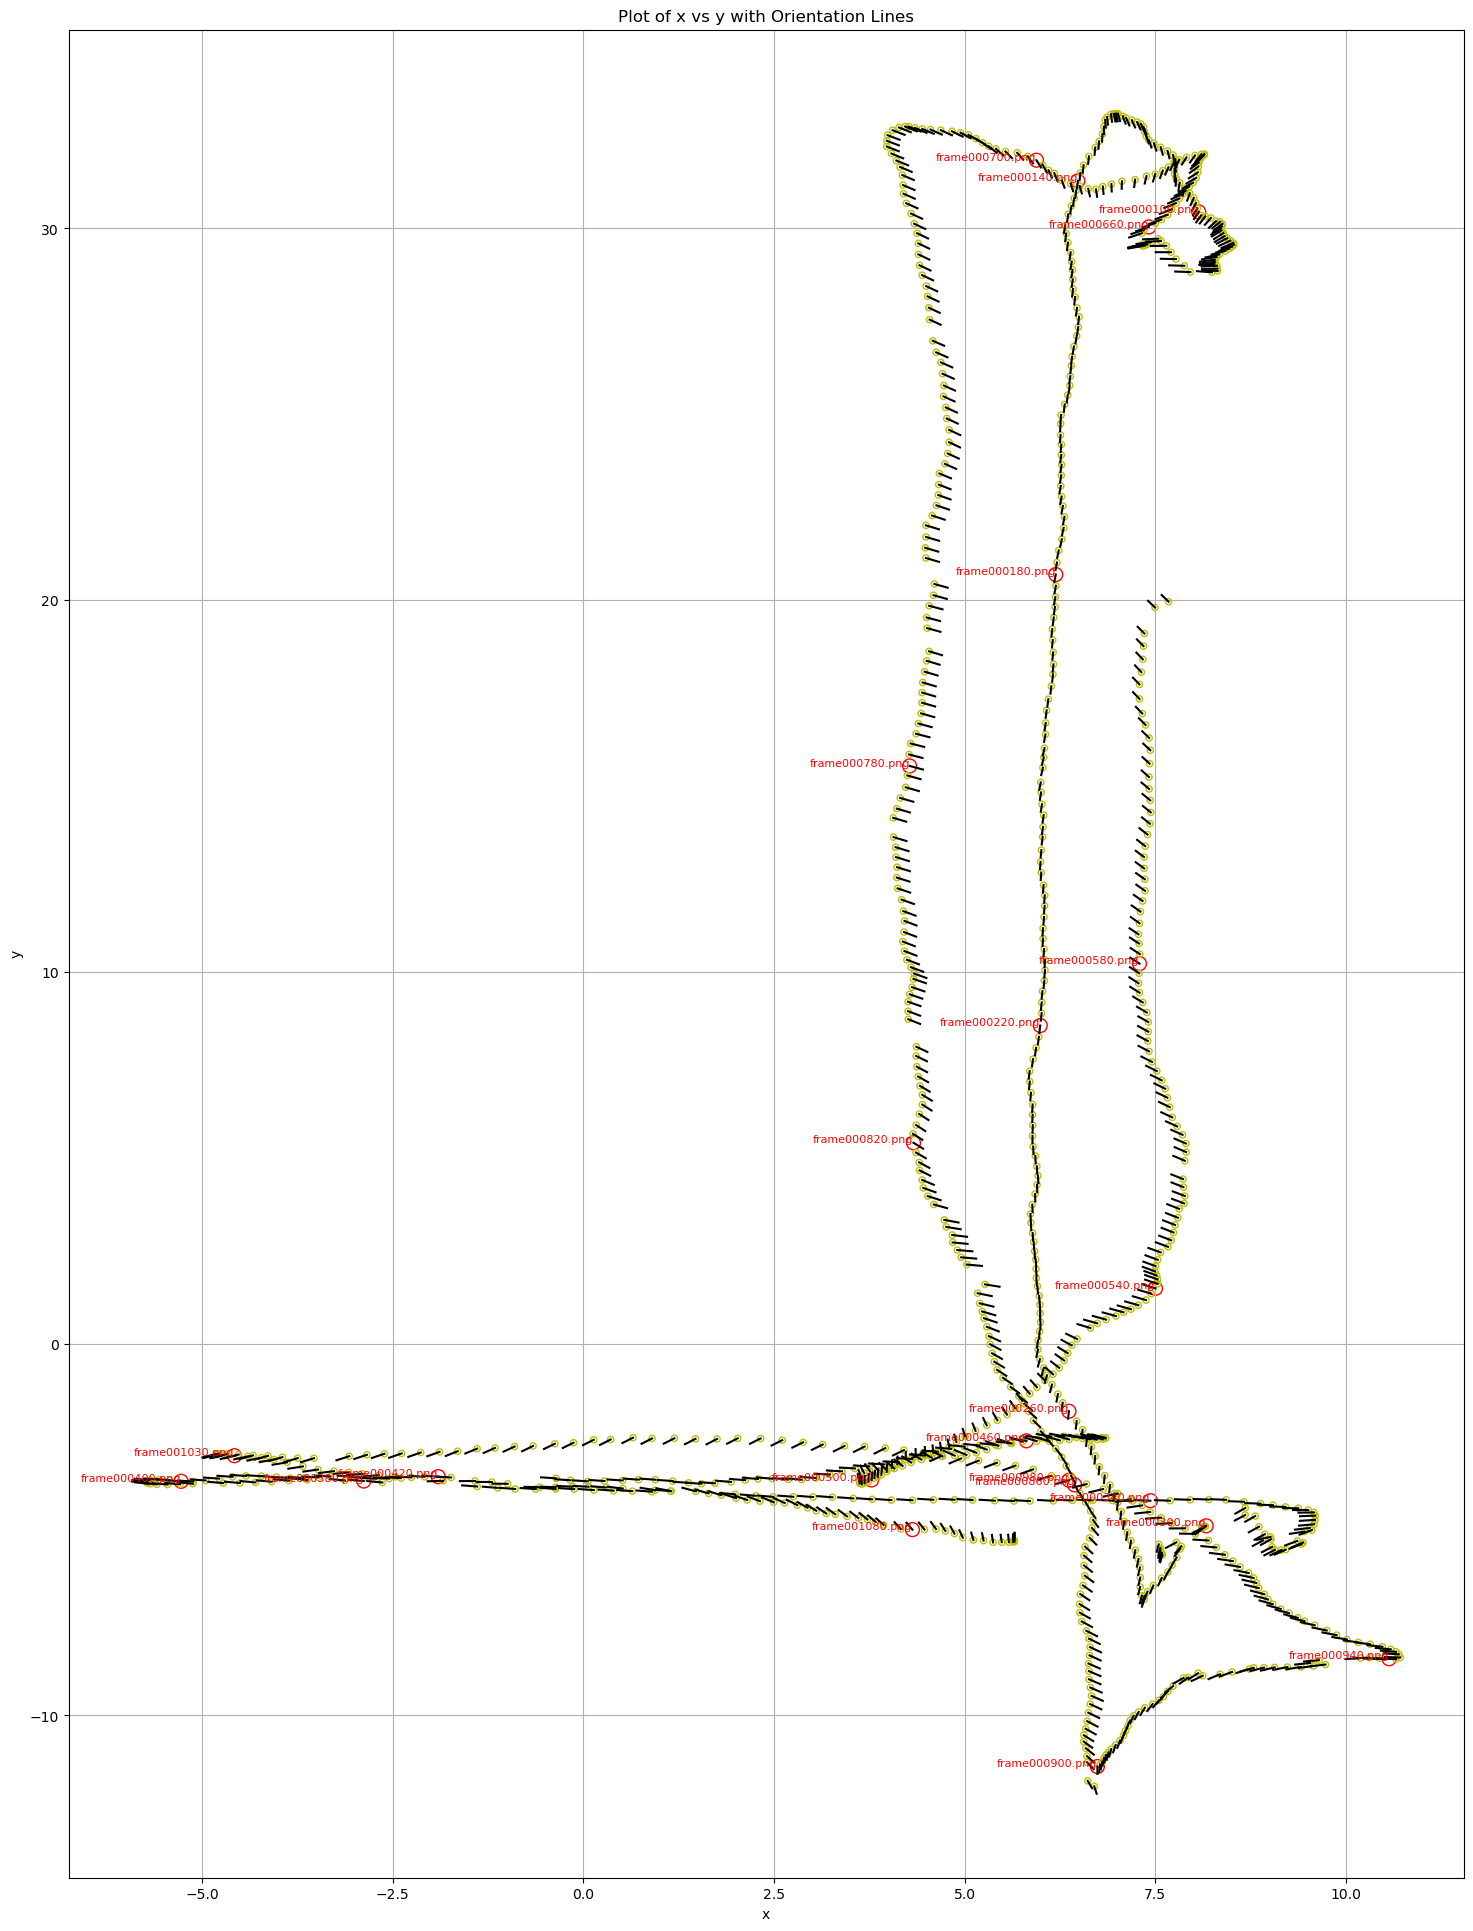

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'rene4_cpu_int_ext_rpy2.csv'
data = pd.read_csv(file_path)
data = data.drop([244, 245, 246, 247, 248, 805])

# Corrected frame numbers as provided by the user
frame_numbers = [
    "frame000020.png", "frame000060.png", "frame000100.png", "frame000140.png",
    "frame000180.png", "frame000220.png", "frame000260.png", "frame000300.png", 
    "frame000340.png", "frame000380.png", "frame000400.png", "frame000420.png", 
    "frame000460.png", "frame000500.png", "frame000540.png", "frame000580.png", 
    "frame000620.png", "frame000660.png", "frame000700.png", "frame000740.png", 
    "frame000780.png", "frame000820.png", "frame000860.png", "frame000900.png", 
    "frame000940.png", "frame000980.png", "frame001030.png", "frame001080.png"
]

# Filter the data to only include the specified frames
is_sel = data['#name'].isin(frame_numbers)

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length

# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(18, 24))
plt.scatter(data[is_sel]['x'], data[is_sel]['y'], s=100, facecolors='none', edgecolors='r')  # Circle points
plt.scatter(data[~is_sel]['x'], data[~is_sel]['y'], s=20, facecolors='none', edgecolors='y')  # Circle points
for i, row in data.iterrows():
    plt.plot([row['x'], end_x[i]], [row['y'], end_y[i]], 'k-')  # Lines for orientation

for i, row in data[is_sel].iterrows():
    plt.text(row['x'], row['y'], row['#name'], color='r', fontsize=8, ha='right')

plt.title('Plot of x vs y with Orientation Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


# Leave only overlapped data

In [80]:
import pandas as pd

# Load the CSV file for 'real_final_team1.csv' and filter entries starting with "prame"
file_path1 = 'real_final_team1.csv'
data1 = pd.read_csv(file_path1, skiprows=1)
is_prame = data1['#name'].str.startswith('prame')
prame_data = data1[is_prame]

prame_data['#name'] = prame_data['#name'].str.replace('prame', 'frame')

# Load the CSV file for 'rene4_cpu_int_ext_rpy2.csv' and apply specific frame filters
file_path2 = 'rene4_cpu_int_ext_rpy2.csv'
data2 = pd.read_csv(file_path2)
data2 = data2.drop([244, 245, 246, 247, 248, 805])

frame_numbers = [
    "frame000020.png", "frame000060.png", "frame000100.png", "frame000140.png",
    "frame000180.png", "frame000220.png", "frame000260.png", "frame000300.png", 
    "frame000340.png", "frame000380.png", "frame000400.png", "frame000420.png", 
    "frame000460.png", "frame000500.png", "frame000540.png", "frame000580.png", 
    "frame000620.png", "frame000660.png", "frame000700.png", "frame000740.png", 
    "frame000780.png", "frame000820.png", "frame000860.png", "frame000900.png", 
    "frame000940.png", "frame000980.png", "frame001030.png", "frame001080.png"
]
is_sel = data2['#name'].isin(frame_numbers)
sel_data = data2[is_sel]

# Extract matching frame names from the lists starting with "prame" and selected "frame" numbers
matching_frame_names = prame_data['#name'].isin(sel_data['#name'])
matched_data = prame_data[matching_frame_names]

# Display matched data
# Optionally, to also show matches from 'rene4_cpu_int_ext_rpy2.csv' based on matched 'prame' data
matched_sel_data = sel_data[sel_data['#name'].isin(matched_data['#name'])]
# print(matched_data) # print(matched_data.shape) # print(matched_sel_data)

OUTLIER_LIST = ['frame000460.png','frame000940.png', 'frame000860.png']

dropout = matched_data['#name'].isin(OUTLIER_LIST)
team1_data = matched_data[~dropout]
dropout = matched_sel_data['#name'].isin(OUTLIER_LIST)
sim_data = matched_sel_data[~dropout]
print(team1_data.shape, sim_data.shape)
team1_data

(16, 7) (16, 7)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_42176\3066042460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prame_data['#name'] = prame_data['#name'].str.replace('prame', 'frame')


,#name,x,y,z,heading,pitch,roll
1257,frame000100.png,-15.739941,11.780842,2.295930,131.456042,81.103661,-6.268701
1258,frame000140.png,-17.910733,11.223471,2.410625,150.545704,84.607311,29.430529
1259,frame000180.png,-7.878602,5.312273,2.266041,131.737666,80.129375,3.503000
1260,frame000220.png,0.678566,0.602736,2.537254,145.031510,80.832435,21.479452
1261,frame000260.png,8.430184,-3.097832,2.739223,165.901031,84.611161,43.530515
1262,frame000340.png,12.202873,-4.563500,2.695569,-109.752606,81.215459,37.999757
1263,frame000380.png,7.522749,-13.054435,2.859809,-121.826600,80.269299,18.745808
1264,frame000400.png,5.387319,-15.958639,2.442748,-110.612579,84.529660,37.555331
1265,frame000420.png,7.550966,-12.634110,3.033098,-133.997313,81.252111,7.829637
1267,frame000500.png,9.945671,-7.605947,2.802196,-41.474399,80.613660,16.563628


# Calculate Transformation Matrix

In [81]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from numpy.linalg import inv

def create_pose_matrix(x, y, z, heading, pitch, roll):
    """Create a 4x4 pose matrix from translation and Euler angles."""
    rot = eul2rot(heading, pitch, roll)
    pose_matrix = np.eye(4)
    pose_matrix[:3, :3] = rot
    pose_matrix[:3, 3] = [x, y, z]
    return pose_matrix

# Example DataFrames with data (please ensure prame_data and sel_data are loaded properly)
# Generate pose matrices for each dataset
team1_poses = [create_pose_matrix(row['x'], row['y'], row['z'], row['heading'], row['pitch'], row['roll']) for index, row in team1_data.iterrows()]
sim_poses = [create_pose_matrix(row['x'], row['y'], row['z'], row['heading'], row['pitch'], row['roll']) for index, row in sim_data.iterrows()]

# Compute individual transformations
transformations = []

for team1_pose, sim_pose in zip(team1_poses, sim_poses):
    # Compute the transformation T_i for each pair (T_i * sim_pose = team1_pose)
    # Rearrange to T_i = team1_pose * inv(sim_pose)
    T_i = team1_pose @ inv(sim_pose)
    transformations.append(T_i)

# Average the transformations to find the final matrix
average_transformation = sum(transformations) / len(transformations)

print("Averaged Transformation Matrix T:\n", average_transformation)


Averaged Transformation Matrix T:
 [[ 4.85793388e-01 -8.62706502e-01 -1.23237023e-01  5.24399883e+00]
 [ 8.71353596e-01  4.79920650e-01  7.74423722e-02 -9.51625536e+00]
 [-6.55010732e-03 -1.45716910e-01  9.87441435e-01  2.55576194e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# Apply Transformation

In [82]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# Transform each pose in sel_data using the transformation matrix T
T_matrix = average_transformation
transformed_poses = [np.dot(T_matrix, pose) for pose in sim_poses]

# Example to extract translation and Euler angles from the transformed poses
transformed_parameters = []
for pose in transformed_poses:
    # Extract translation
    x, y, z = pose[:3, 3]
    
    # Extract rotation matrix and convert to Euler angles
    rot_matrix = pose[:3, :3]
    euler_angles = R.from_matrix(rot_matrix).as_euler('xyz', degrees=True)
    
    # Store parameters
    transformed_parameters.append({
        'x': x,
        'y': y,
        'z': z,
        'heading': euler_angles[0],
        'pitch': euler_angles[1],
        'roll': euler_angles[2]
    })

# Optionally, print the transformed parameters for verification
for params in transformed_parameters:
    print(params)
    break

{'x': -17.24810195667938, 'y': 12.218231589812218, 'z': -0.7574311873453361, 'heading': 149.14652561397918, 'pitch': 79.80705346187621, 'roll': 12.414255158504632}


# Display Transformed

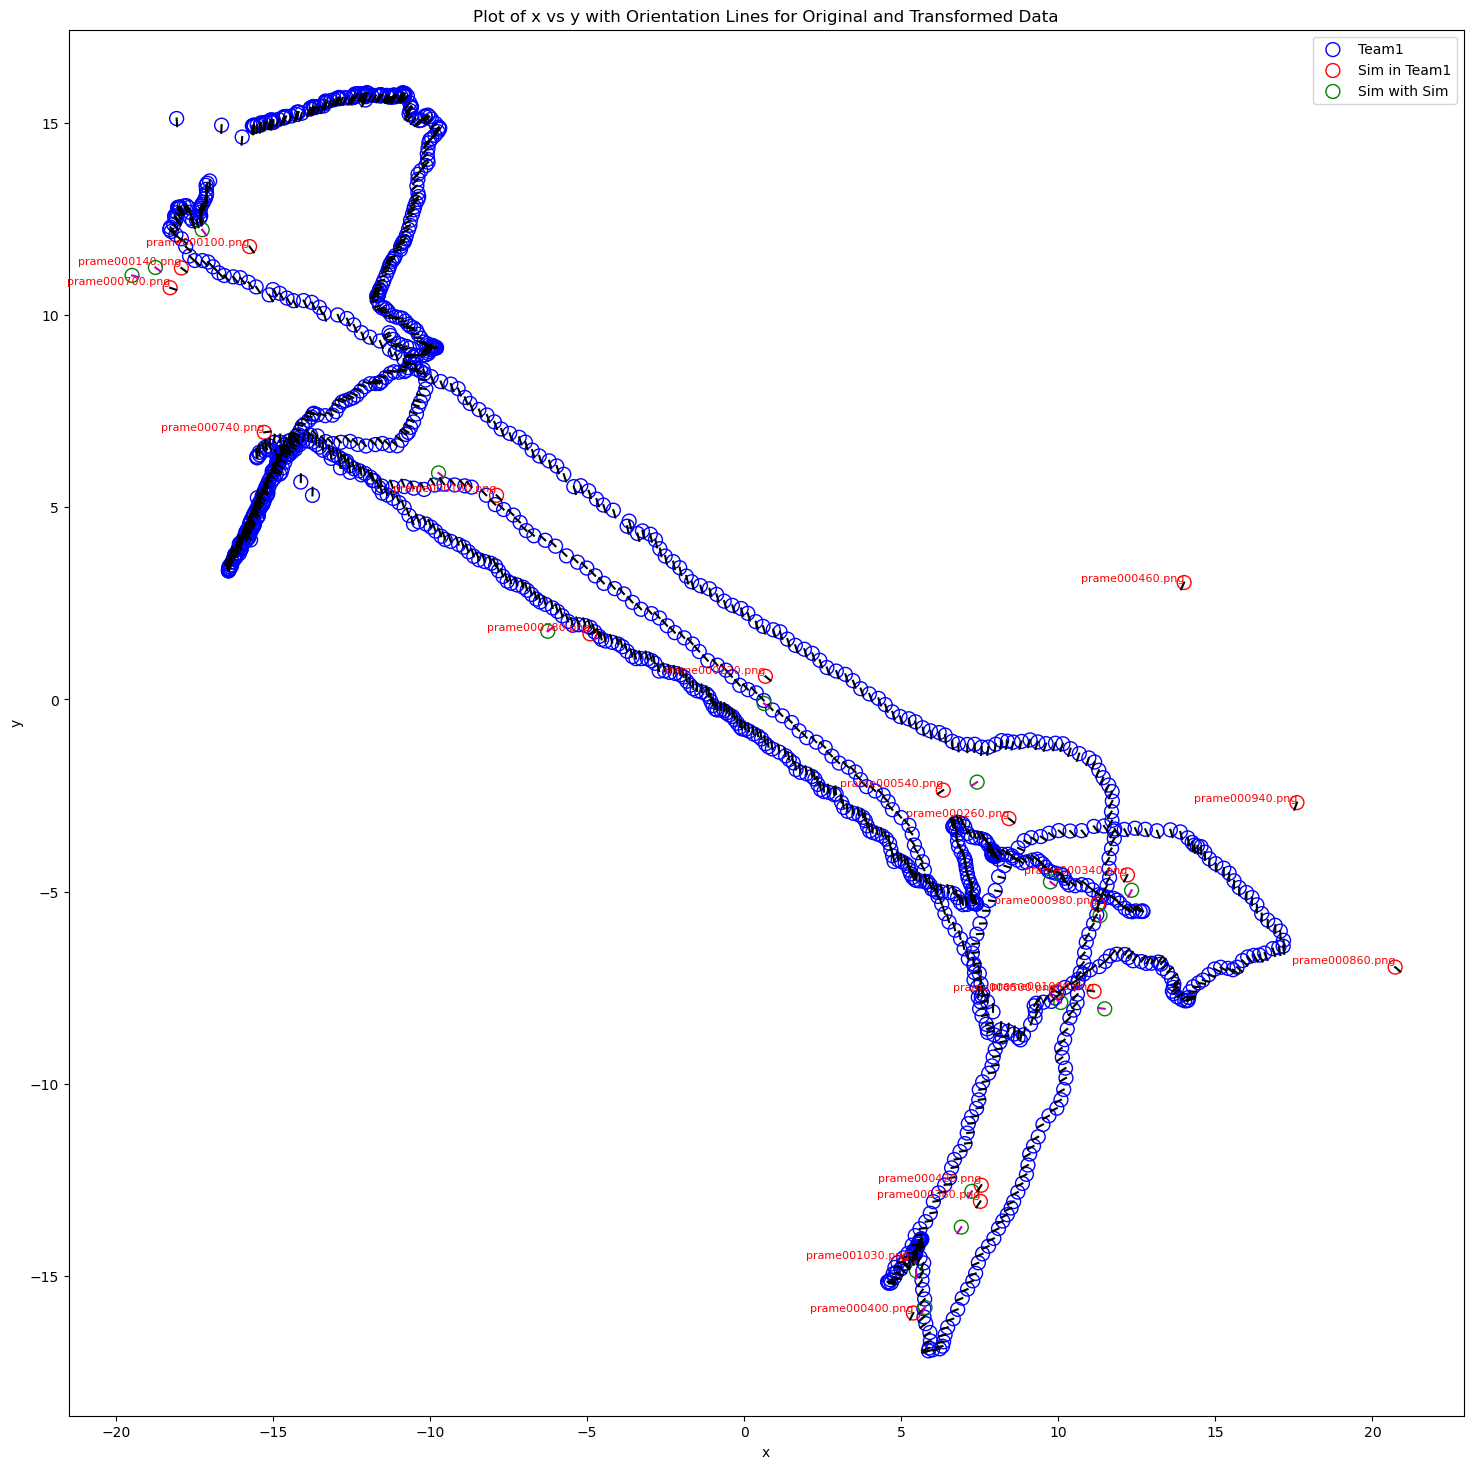

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Transform each pose in sel_data using the transformation matrix T
transformed_poses = [np.dot(T_matrix, pose) for pose in sim_poses]

# Example to extract translation and Euler angles from the transformed poses
transformed_parameters = []
for pose in transformed_poses:
    # Extract translation
    x, y, z = pose[:3, 3]
    
    # Extract rotation matrix and convert to Euler angles
    rot_matrix = pose[:3, :3]
    euler_angles = R.from_matrix(rot_matrix).as_euler('xyz', degrees=True)
    
    # Store parameters
    transformed_parameters.append({
        'x': x,
        'y': y,
        'z': z,
        'heading': euler_angles[0],
        'pitch': euler_angles[1],
        'roll': euler_angles[2]
    })
    
sim_pose_tf = pd.DataFrame(transformed_parameters)

# Load the CSV file
file_path = 'real_final_team1.csv'
data = pd.read_csv(file_path, skiprows=1)

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(sim_pose_tf['heading'], sim_pose_tf['pitch'], sim_pose_tf['roll'])
])

# Extract x and y components
sim_end_x = sim_pose_tf['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
sim_end_y = sim_pose_tf['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length


# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(18, 18))

# Determine which entries start with "prame" and which with "frame"
is_prame = data['#name'].str.startswith('prame')
# Plotting x vs y with circle points for "frame" and "prame"
plt.scatter(data[~is_prame]['x'], data[~is_prame]['y'], s=100, facecolors='none', edgecolors='b', label='Team1')  # Circle points for "frame"
plt.scatter(data[is_prame]['x'], data[is_prame]['y'], s=100, facecolors='none', edgecolors='r', label='Sim in Team1')  # Circle points for "prame"

for _, row in data.iterrows():
    plt.plot([row['x'], end_x[_]], [row['y'], end_y[_]], 'k-')  # Lines for orientation

for _, row in data[is_prame].iterrows():
    plt.text(row['x'], row['y']+np.random.rand(1)*0.1, row['#name'], color='r', fontsize=8, ha='right')

# Plotting transformed data points
plt.scatter(sim_pose_tf['x'], sim_pose_tf['y'], s=100, facecolors='none', edgecolors='g', label='Sim with Sim')  # Circle points for transformed data
for i, row in sim_pose_tf.iterrows():
    plt.plot([row['x'], sim_end_x[i]], [row['y'], sim_end_y[i]], 'm-')  # Magenta lines for transformed orientation

plt.title('Plot of x vs y with Orientation Lines for Original and Transformed Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Diplay the two datasets

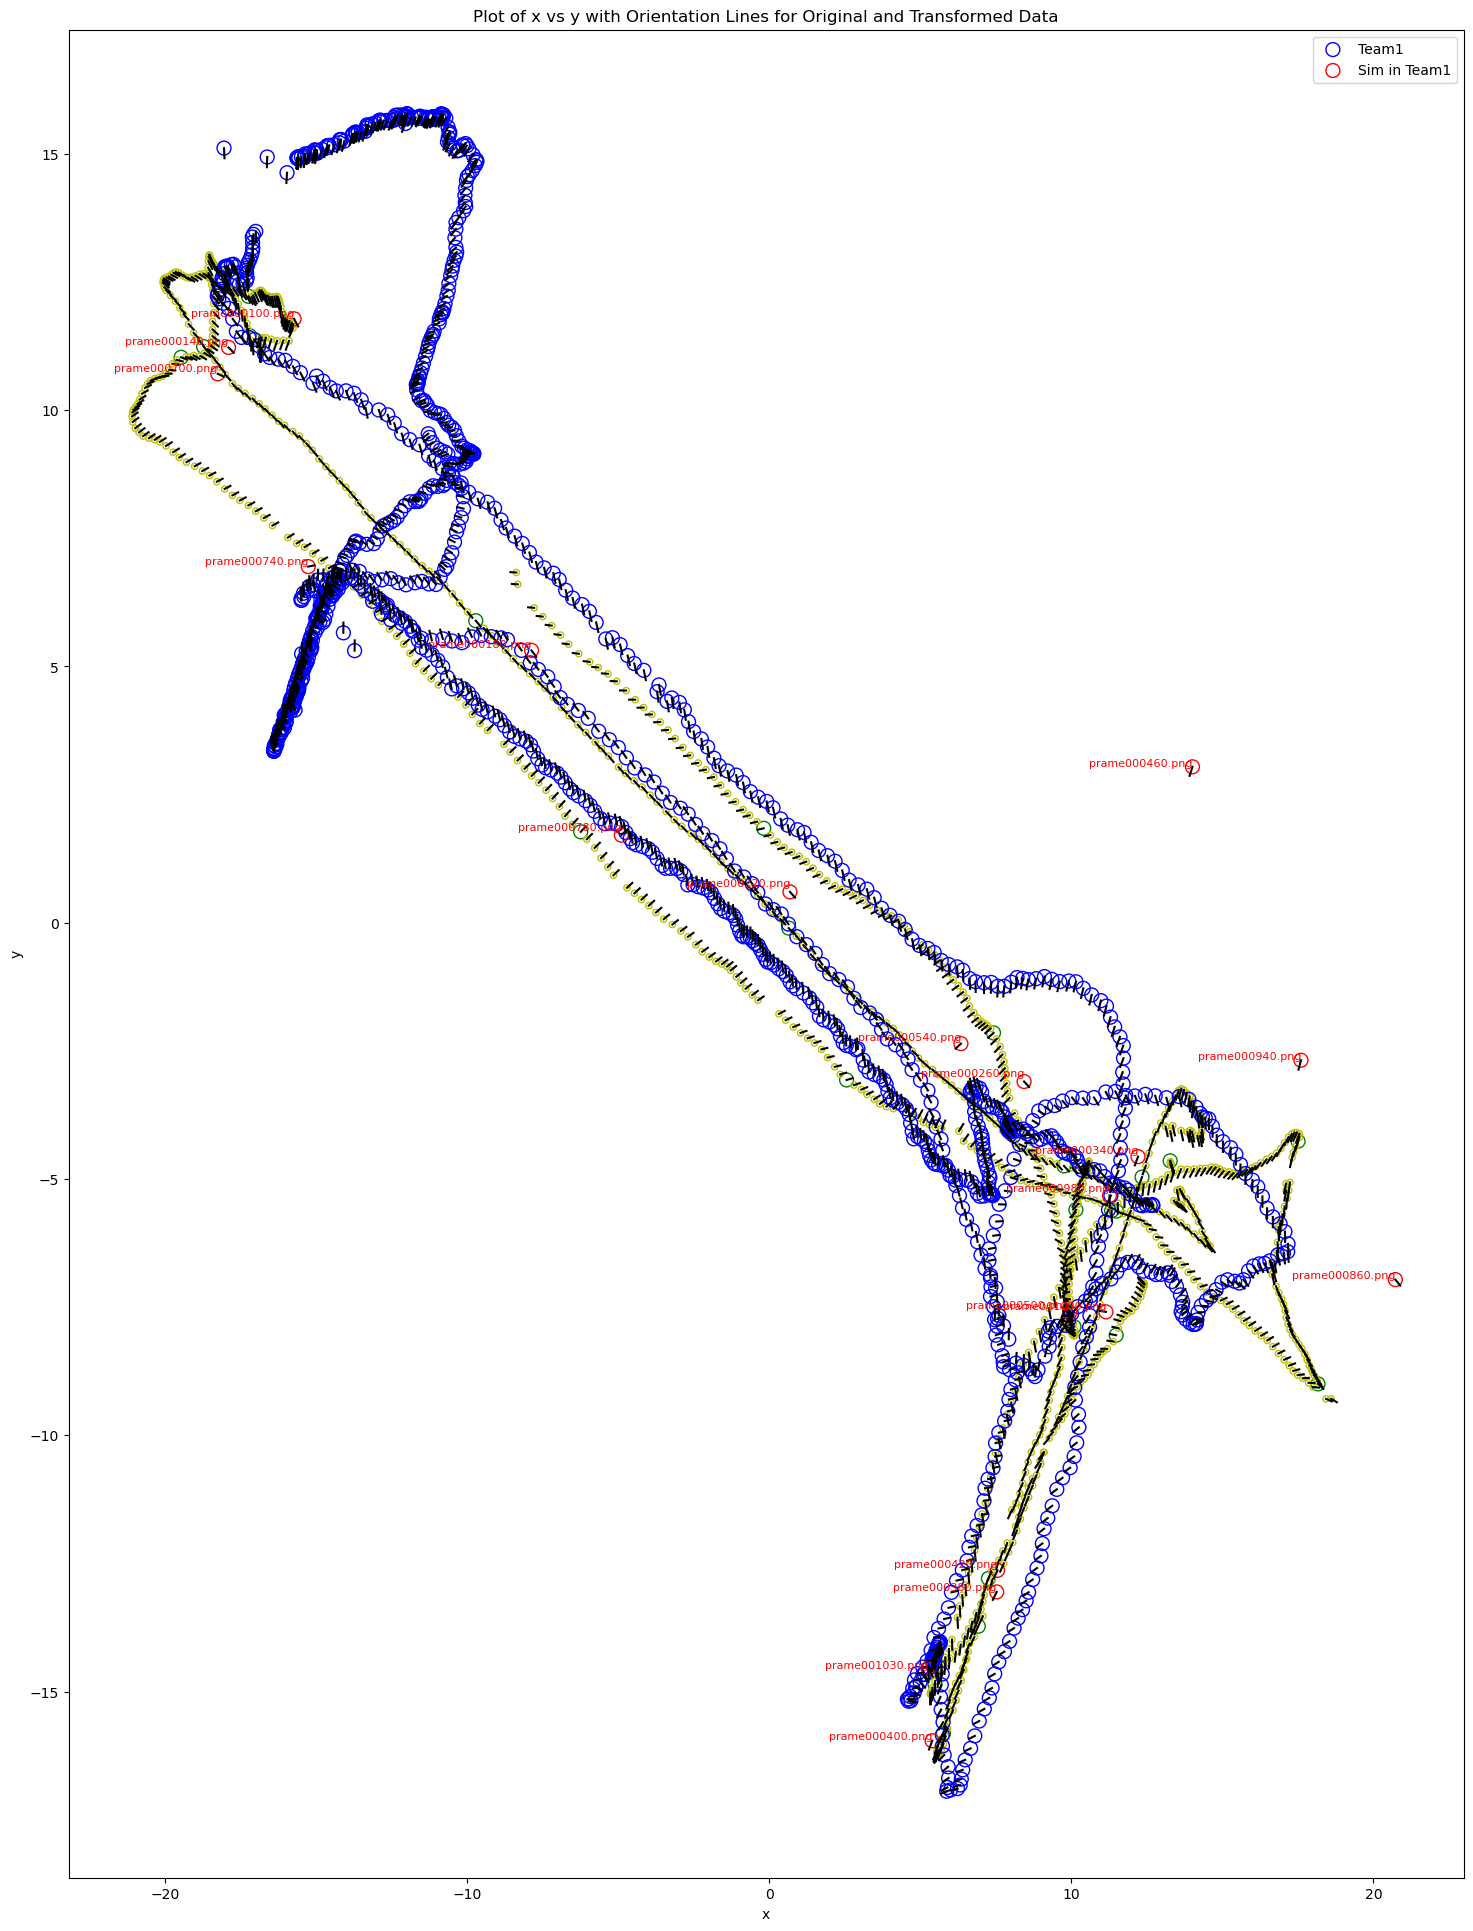

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'rene4_cpu_int_ext_rpy2.csv'
data = pd.read_csv(file_path)
data = data.drop([244, 245, 246, 247, 248, 805])

# Corrected frame numbers as provided by the user
frame_numbers = [
    "frame000020.png", "frame000060.png", "frame000100.png", "frame000140.png",
    "frame000180.png", "frame000220.png", "frame000260.png", "frame000300.png", 
    "frame000340.png", "frame000380.png", "frame000400.png", "frame000420.png", 
    "frame000460.png", "frame000500.png", "frame000540.png", "frame000580.png", 
    "frame000620.png", "frame000660.png", "frame000700.png", "frame000740.png", 
    "frame000780.png", "frame000820.png", "frame000860.png", "frame000900.png", 
    "frame000940.png", "frame000980.png", "frame001030.png", "frame001080.png"
]

# Filter the data to only include the specified frames
is_sel = data['#name'].isin(frame_numbers)
is_sel = np.array(is_sel)
############# Apply Transformation ##############
import numpy as np
from scipy.spatial.transform import Rotation as R

# Transform each pose in sel_data using the transformation matrix T
T_matrix = average_transformation
sim_poses = [create_pose_matrix(row['x'], row['y'], row['z'], row['heading'], row['pitch'], row['roll']) for index, row in data.iterrows()]
transformed_poses = [np.dot(T_matrix, pose) for pose in sim_poses]

# Example to extract translation and Euler angles from the transformed poses
transformed_parameters = []
for pose in transformed_poses:
    # Extract translation
    x, y, z = pose[:3, 3]
    
    # Extract rotation matrix and convert to Euler angles
    rot_matrix = pose[:3, :3]
    euler_angles = R.from_matrix(rot_matrix).as_euler('xyz', degrees=True)
    
    # Store parameters
    transformed_parameters.append({
        'x': x,
        'y': y,
        'z': z,
        'heading': euler_angles[0],
        'pitch': euler_angles[1],
        'roll': euler_angles[2]
    })

data = pd.DataFrame(transformed_parameters)
############# Display Sim Data ####################


# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length

# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(18, 24))
plt.scatter(data[is_sel]['x'], data[is_sel]['y'], s=100, facecolors='none', edgecolors='g')  # Circle points
plt.scatter(data[~is_sel]['x'], data[~is_sel]['y'], s=20, facecolors='none', edgecolors='y')  # Circle points
for i, row in data.iterrows():
    plt.plot([row['x'], end_x[i]], [row['y'], end_y[i]], 'k-')  # Lines for orientation

################ Team 1 Data ##########################

# Load the CSV file
file_path = 'real_final_team1.csv'
data = pd.read_csv(file_path, skiprows=1)

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length

# Determine which entries start with "prame" and which with "frame"
is_prame = data['#name'].str.startswith('prame')
# Plotting x vs y with circle points for "frame" and "prame"
plt.scatter(data[~is_prame]['x'], data[~is_prame]['y'], s=100, facecolors='none', edgecolors='b', label='Team1')  # Circle points for "frame"
plt.scatter(data[is_prame]['x'], data[is_prame]['y'], s=100, facecolors='none', edgecolors='r', label='Sim in Team1')  # Circle points for "prame"

for _, row in data.iterrows():
    plt.plot([row['x'], end_x[_]], [row['y'], end_y[_]], 'k-')  # Lines for orientation

for _, row in data[is_prame].iterrows():
    plt.text(row['x'], row['y']+np.random.rand(1)*0.1, row['#name'], color='r', fontsize=8, ha='right')


plt.title('Plot of x vs y with Orientation Lines for Original and Transformed Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
